# Results and Data Analysis

### Import

In [3]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
import seaborn as sns
import pandas as pd
import statistics
import scipy.optimize, scipy.stats

### Reading Input Data

In [10]:
df = pd.read_csv (r'Data/Input/cal-housing.csv')							# leggo dati

### Real Prices Map and Zoning of the Area

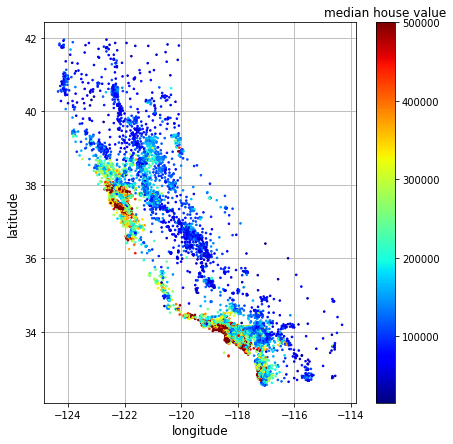

In [5]:
fig=plt.figure(figsize=(7,7))

plt.scatter(df.longitude, df.latitude, c=df.median_house_value, marker='.', s=10, cmap='jet', zorder=3)
plt.xlabel('longitude', fontsize='12')
plt.ylabel('latitude', fontsize='12')
cbar = plt.colorbar()
cbar.ax.set_title('median house value', fontsize='12')
plt.grid(True, zorder=0)

plt.show()

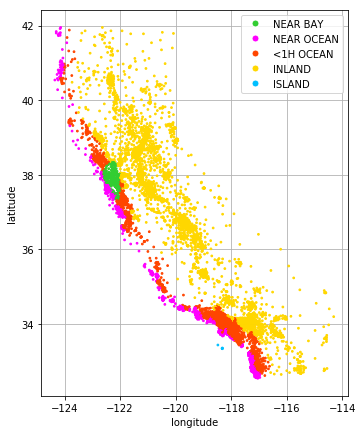

In [6]:
fig=plt.figure(figsize=(5.5,7.1))
colors = {'NEAR BAY':'limegreen', 'NEAR OCEAN':'magenta', '<1H OCEAN':'orangered', 'INLAND':'gold', 'ISLAND':'deepskyblue'}
plt.scatter(df.longitude, df.latitude, c=df.ocean_proximity.apply(lambda x: colors[x]), marker='.', s=12, zorder=3)


custom_points =[Line2D([0], [0], marker='o', color='w', markerfacecolor='limegreen', label='NEAR BAY', markersize=7),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='magenta', label='NEAR OCEAN', markersize=7),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='orangered', label='<1H OCEAN', markersize=7),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='gold', label='INLAND', markersize=7),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='deepskyblue', label='ISLAND', markersize=7)]

plt.legend(handles=custom_points, fontsize='10')
plt.xlabel('longitude', fontsize='10')
plt.ylabel('latitude', fontsize='10')
plt.grid(True, zorder=0)

plt.show()

### Price Map of the Bay Area

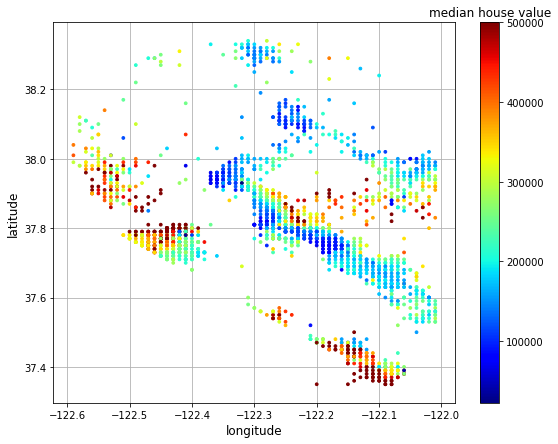

In [7]:
fig=plt.figure(figsize=(9,7))
plt.scatter(df.longitude[df.ocean_proximity=='NEAR BAY'], df.latitude[df.ocean_proximity=='NEAR BAY'], c=df.median_house_value[df.ocean_proximity=='NEAR BAY'], marker='.', s=30, cmap='jet', zorder=3)
cbar = plt.colorbar()
cbar.ax.set_title('median house value', fontsize='12')
plt.xlabel('longitude', fontsize='12')
plt.ylabel('latitude', fontsize='12')
plt.grid(True, zorder=0)
plt.show()

### Prices as a function of Given Features

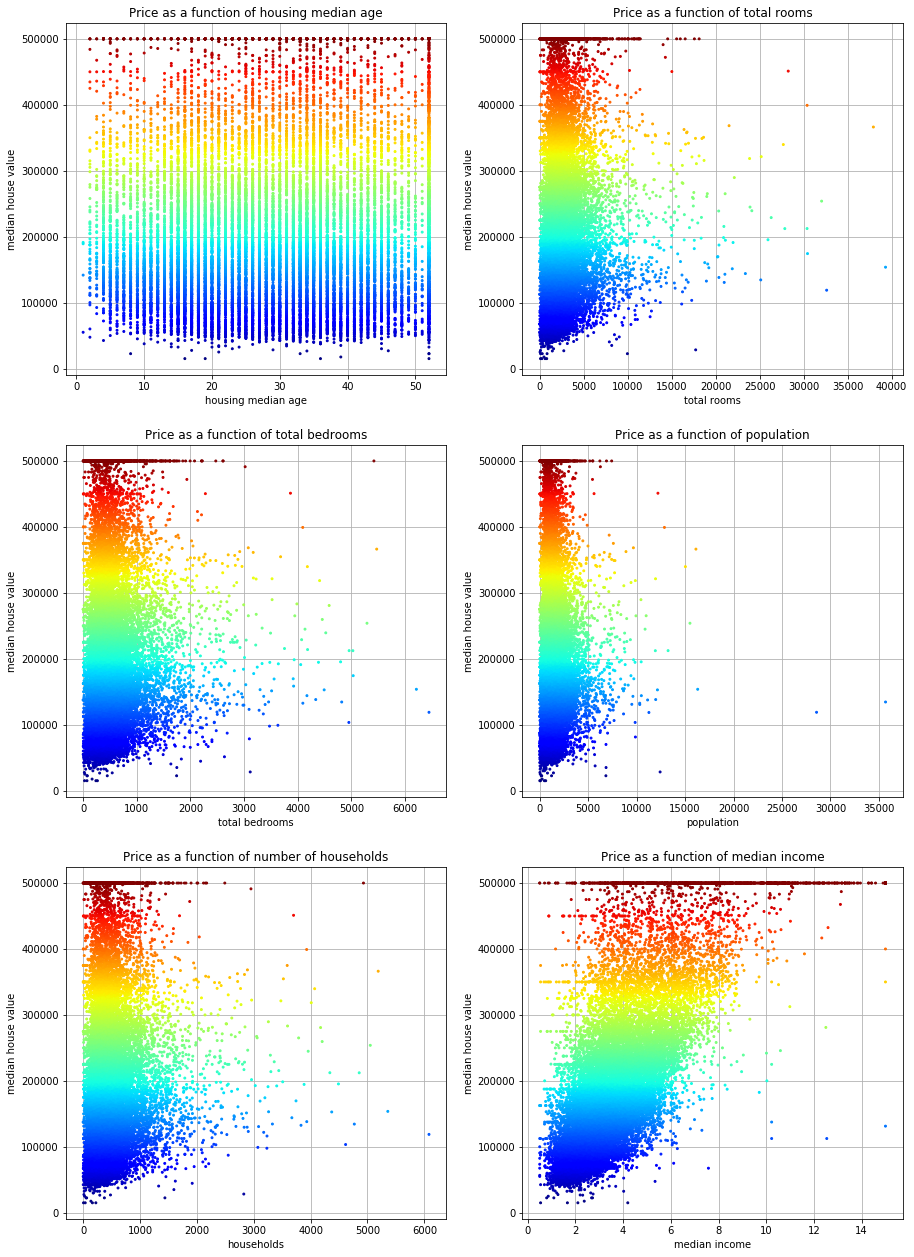

In [8]:
fig=plt.figure(figsize=(15,22))

plt.subplot(3,2,1)
plt.scatter(df.housing_median_age,df.median_house_value, c=df.median_house_value, marker='.', s=15, cmap='jet', zorder=3)
plt.xlabel('housing median age')
plt.ylabel('median house value')
plt.title('Price as a function of housing median age')
plt.grid(True, zorder=0)

plt.subplot(3,2,2)
plt.scatter((df.total_rooms),df.median_house_value, c=df.median_house_value, marker='.', s=15, cmap='jet', zorder=3)
plt.xlabel('total rooms')
plt.ylabel('median house value')
plt.title('Price as a function of total rooms')
#plt.xlim(0,20000)
plt.grid(True, zorder=0)

plt.subplot(3,2,3)
plt.scatter((df.total_bedrooms),df.median_house_value, c=df.median_house_value, marker='.', s=15, cmap='jet', zorder=3)
plt.xlabel('total bedrooms')
plt.ylabel('median house value')
plt.title('Price as a function of total bedrooms')
#plt.xlim(0,4000)
plt.grid(True, zorder=0)

plt.subplot(3,2,4)
plt.scatter(df.population,df.median_house_value, c=df.median_house_value, marker='.', s=15, cmap='jet', zorder=3)
plt.xlabel('population')
plt.ylabel('median house value')
plt.title('Price as a function of population')
#plt.xlim(0,5000)
plt.grid(True, zorder=0)

plt.subplot(3,2,5)
plt.scatter((df.households),df.median_house_value, c=df.median_house_value, marker='.', s=15, cmap='jet', zorder=3)
plt.xlabel('households')
plt.ylabel('median house value')
plt.title('Price as a function of number of households')
#plt.xlim(0,4000)
plt.grid(True, zorder=0)

plt.subplot(3,2,6)
plt.scatter(df.median_income,df.median_house_value, c=df.median_house_value, marker='.', s=15, cmap='jet', zorder=3)
plt.xlabel('median income')
plt.ylabel('median house value')
plt.title('Price as a function of median income')
plt.grid(True, zorder=0)




plt.show()

### Prices as a function of Extra Features

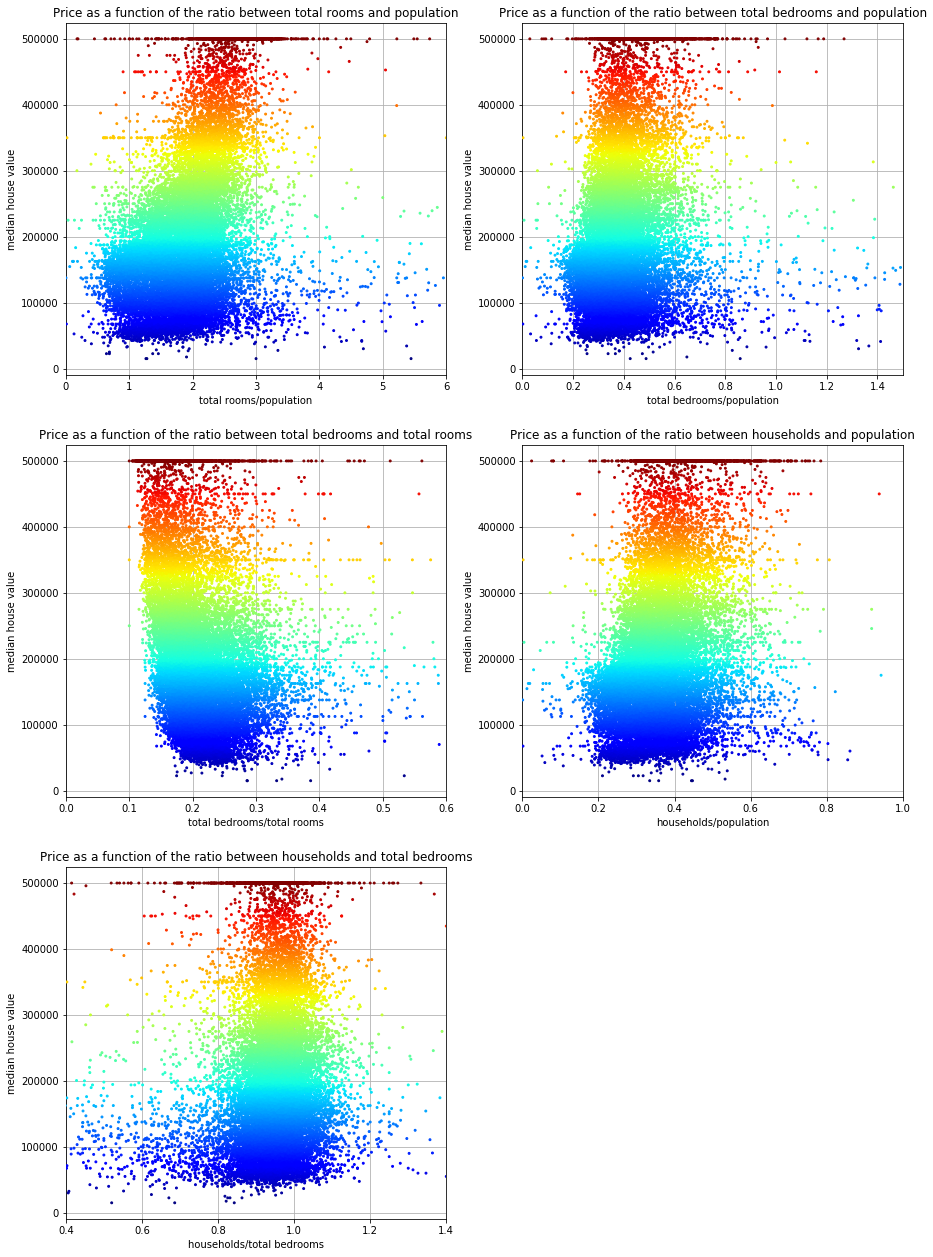

In [9]:
fig=plt.figure(figsize=(15,22))

plt.subplot(3,2,1)
plt.scatter(df.total_rooms/df.population,df.median_house_value, c=df.median_house_value, marker='.', s=15, cmap='jet', zorder=3)
plt.xlabel('total rooms/population')
plt.ylabel('median house value')
plt.xlim(0,6)
plt.title('Price as a function of the ratio between total rooms and population')
plt.grid(True, zorder=0)

plt.subplot(3,2,2)
plt.scatter(df.total_bedrooms/df.population,df.median_house_value, c=df.median_house_value, marker='.', s=15, cmap='jet', zorder=3)
plt.xlabel('total bedrooms/population')
plt.ylabel('median house value')
plt.xlim(0,1.5)
plt.title('Price as a function of the ratio between total bedrooms and population')
plt.grid(True, zorder=0)

plt.subplot(3,2,3)
plt.scatter(df.total_bedrooms/df.total_rooms,df.median_house_value, c=df.median_house_value, marker='.', s=15, cmap='jet', zorder=3)
plt.xlabel('total bedrooms/total rooms')
plt.ylabel('median house value')
plt.xlim(0,0.6)
plt.title('Price as a function of the ratio between total bedrooms and total rooms')
plt.grid(True, zorder=0)

plt.subplot(3,2,4)
plt.scatter(df.households/df.population,df.median_house_value, c=df.median_house_value, marker='.', s=15, cmap='jet', zorder=3)
plt.xlabel('households/population')
plt.ylabel('median house value')
plt.xlim(0,1)
plt.title('Price as a function of the ratio between households and population')
plt.grid(True, zorder=0)


plt.subplot(3,2,5)
plt.scatter(df.households/df.total_bedrooms,df.median_house_value, c=df.median_house_value, marker='.', s=15, cmap='jet', zorder=3)
plt.xlabel('households/total bedrooms')
plt.ylabel('median house value')
plt.xlim(0.4,1.4)
plt.title('Price as a function of the ratio between households and total bedrooms')
plt.grid(True, zorder=0)

plt.show()

### Distribution of Real Prices

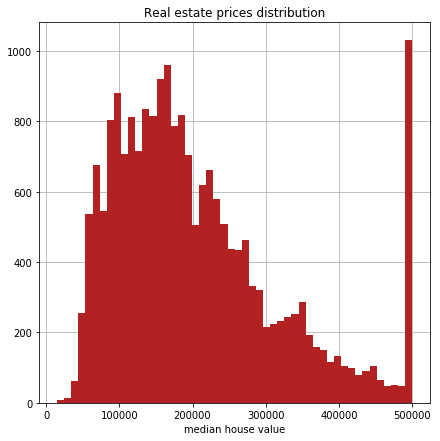

In [10]:
fig=plt.figure(figsize=(7,7))

plt.hist(df.median_house_value, bins=50, color='firebrick', zorder=3)
plt.xlabel('median house value')
plt.title('Real estate prices distribution')
plt.grid(True, zorder=0)
plt.show()

### Distribution of Median Age

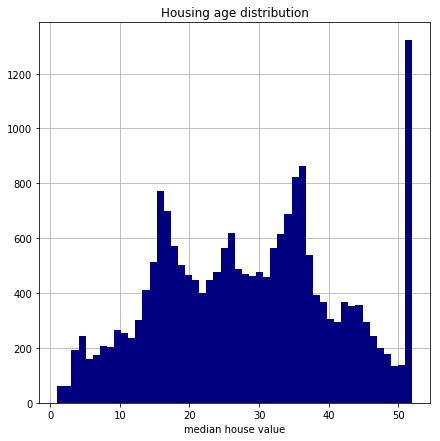

In [5]:
fig=plt.figure(figsize=(7,7))

plt.hist(df.housing_median_age, bins=50, color='navy', zorder=3)
plt.xlabel('median house value')
plt.title('Housing age distribution')
plt.grid(True, zorder=0)
plt.show()

### Looking for a Pattern in Total Bedrooms Missing Values

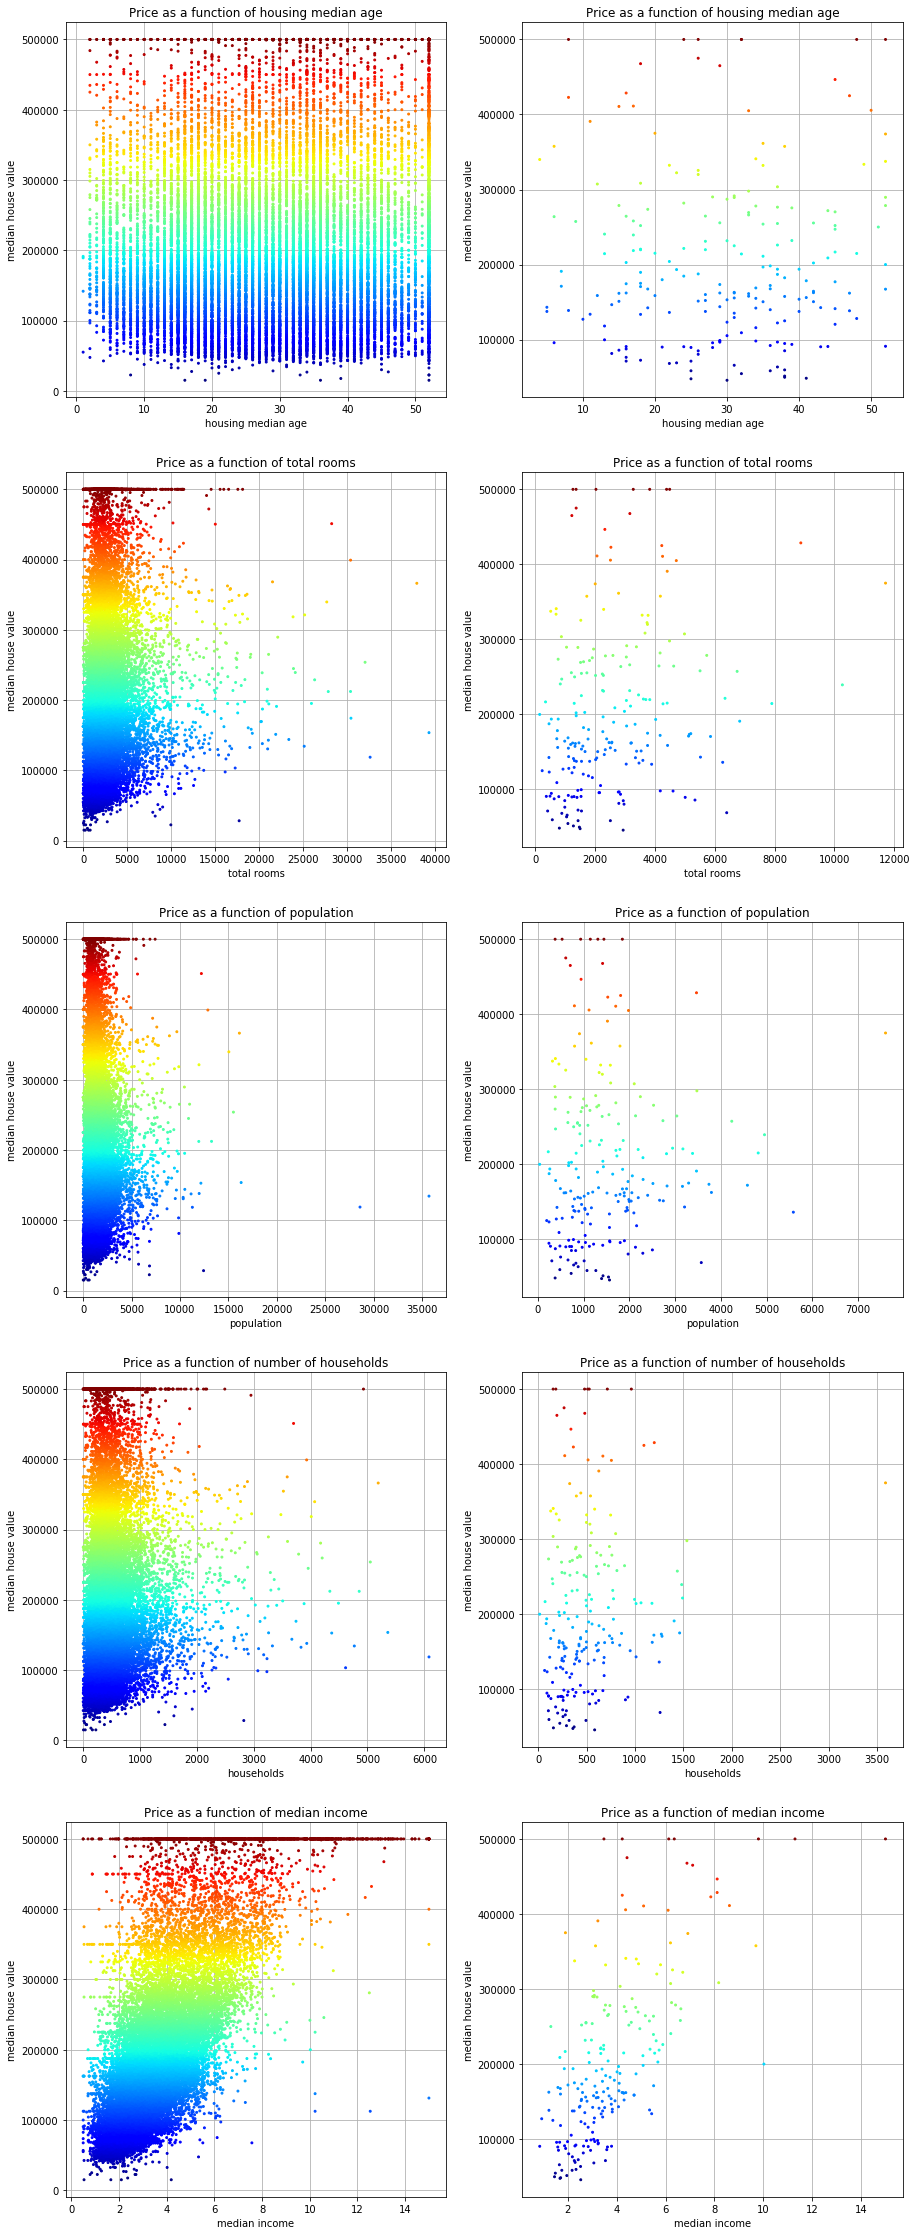

In [11]:
fig=plt.figure(figsize=(15,40))

plt.subplot(5,2,1)
plt.scatter(df.housing_median_age,df.median_house_value, c=df.median_house_value, marker='.', s=15, cmap='jet', zorder=3)
plt.xlabel('housing median age')
plt.ylabel('median house value')
plt.title('Price as a function of housing median age')
plt.grid(True, zorder=0)

plt.subplot(5,2,2)
plt.scatter(df.housing_median_age[df.isna().any(axis=1)],df.median_house_value[df.isna().any(axis=1)], c=df.median_house_value[df.isna().any(axis=1)], marker='.', s=15, cmap='jet', zorder=3)
plt.xlabel('housing median age')
plt.ylabel('median house value')
plt.title('Price as a function of housing median age')
plt.grid(True, zorder=0)

plt.subplot(5,2,3)
plt.scatter((df.total_rooms),df.median_house_value, c=df.median_house_value, marker='.', s=15, cmap='jet', zorder=3)
plt.xlabel('total rooms')
plt.ylabel('median house value')
plt.title('Price as a function of total rooms')
#plt.xlim(0,20000)
plt.grid(True, zorder=0)

plt.subplot(5,2,4)
plt.scatter(df.total_rooms[df.isna().any(axis=1)],df.median_house_value[df.isna().any(axis=1)], c=df.median_house_value[df.isna().any(axis=1)], marker='.', s=15, cmap='jet', zorder=3)
plt.xlabel('total rooms')
plt.ylabel('median house value')
plt.title('Price as a function of total rooms')
#plt.xlim(0,20000)
plt.grid(True, zorder=0)

plt.subplot(5,2,5)
plt.scatter(df.population,df.median_house_value, c=df.median_house_value, marker='.', s=15, cmap='jet', zorder=3)
plt.xlabel('population')
plt.ylabel('median house value')
plt.title('Price as a function of population')
#plt.xlim(0,15000)
plt.grid(True, zorder=0)

plt.subplot(5,2,6)
plt.scatter(df.population[df.isna().any(axis=1)],df.median_house_value[df.isna().any(axis=1)], c=df.median_house_value[df.isna().any(axis=1)], marker='.', s=15, cmap='jet', zorder=3)
plt.xlabel('population')
plt.ylabel('median house value')
plt.title('Price as a function of population')
#plt.xlim(0,15000)
plt.grid(True, zorder=0)

plt.subplot(5,2,7)
plt.scatter(df.households,df.median_house_value, c=df.median_house_value, marker='.', s=15, cmap='jet', zorder=3)
plt.xlabel('households')
plt.ylabel('median house value')
plt.title('Price as a function of number of households')
#plt.xlim(0,4000)
plt.grid(True, zorder=0)

plt.subplot(5,2,8)
plt.scatter(df.households[df.isna().any(axis=1)],df.median_house_value[df.isna().any(axis=1)], c=df.median_house_value[df.isna().any(axis=1)], marker='.', s=15, cmap='jet', zorder=3)
plt.xlabel('households')
plt.ylabel('median house value')
plt.title('Price as a function of number of households')
#plt.xlim(0,4000)
plt.grid(True, zorder=0)

plt.subplot(5,2,9)
plt.scatter(df.median_income,df.median_house_value, c=df.median_house_value, marker='.', s=15, cmap='jet', zorder=3)
plt.xlabel('median income')
plt.ylabel('median house value')
plt.title('Price as a function of median income')
plt.grid(True, zorder=0)

plt.subplot(5,2,10)
plt.scatter(df.median_income[df.isna().any(axis=1)],df.median_house_value[df.isna().any(axis=1)], c=df.median_house_value[df.isna().any(axis=1)], marker='.', s=15, cmap='jet', zorder=3)
plt.xlabel('median income')
plt.ylabel('median house value')
plt.title('Price as a function of median income')
plt.grid(True, zorder=0)


plt.show()

### Final Results Compared to Correct Ones

<Figure size 1224x576 with 0 Axes>

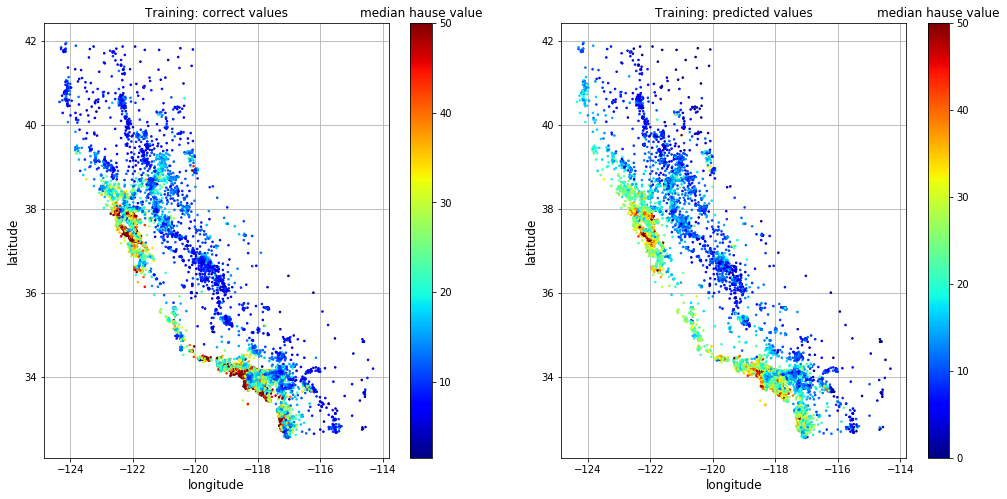

In [13]:
fig=plt.figure(figsize=(17,8))

training_df = pd.read_csv('Data/Output/training.csv')

plt.subplot(1,2,1)
plt.scatter(training_df.longitude, training_df.latitude, c=training_df.correct_labels, marker='.', s=10, cmap='jet', zorder=3)
plt.xlabel('longitude', fontsize='12')
plt.ylabel('latitude', fontsize='12')
cbar = plt.colorbar()
cbar.ax.set_title('median hause value', fontsize='12')
plt.title('Training: correct values')
plt.grid(True, zorder=0)

plt.subplot(1,2,2)
plt.scatter(training_df.longitude, training_df.latitude, c=training_df.predicted_labels, marker='.', s=10, cmap='jet', zorder=3)
plt.xlabel('longitude', fontsize='12')
plt.ylabel('latitude', fontsize='12')
cbar = plt.colorbar()
cbar.ax.set_title('median hause value', fontsize='12')
plt.title('Training: predicted values')
plt.grid(True, zorder=0)


plt.show()

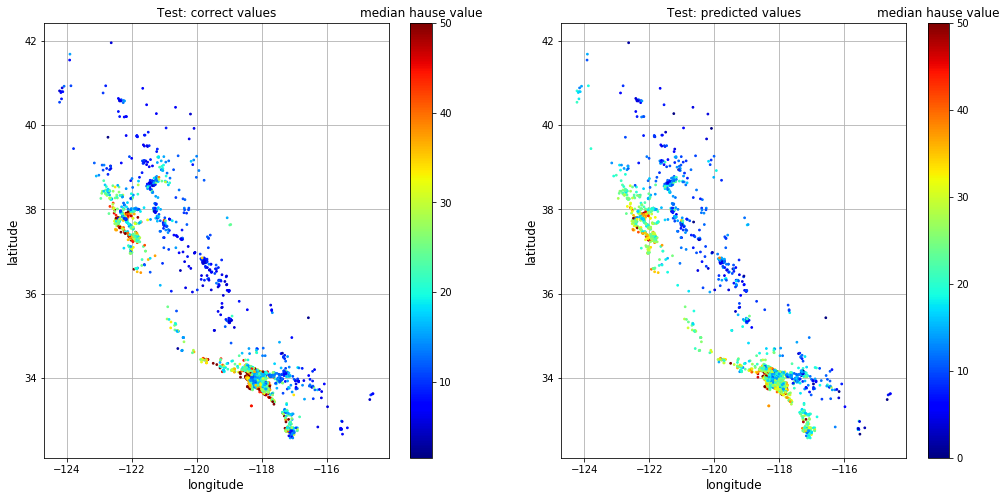

In [14]:
fig=plt.figure(figsize=(17,8))

test_df = pd.read_csv('Data/Output/test.csv')

plt.subplot(1,2,1)
plt.scatter(test_df.longitude, test_df.latitude, c=test_df.correct_labels, marker='.', s=12, cmap='jet', zorder=3)
plt.xlabel('longitude', fontsize='12')
plt.ylabel('latitude', fontsize='12')
cbar = plt.colorbar()
cbar.ax.set_title('median hause value', fontsize='12')
plt.title('Test: correct values')
plt.grid(True, zorder=0)

plt.subplot(1,2,2)
plt.scatter(test_df.longitude, test_df.latitude, c=test_df.predicted_labels, marker='.', s=12, cmap='jet', zorder=3)
plt.xlabel('longitude', fontsize='12')
plt.ylabel('latitude', fontsize='12')
cbar = plt.colorbar()
cbar.ax.set_title('median hause value', fontsize='12')
plt.title('Test: predicted values')
plt.grid(True, zorder=0)


plt.show()

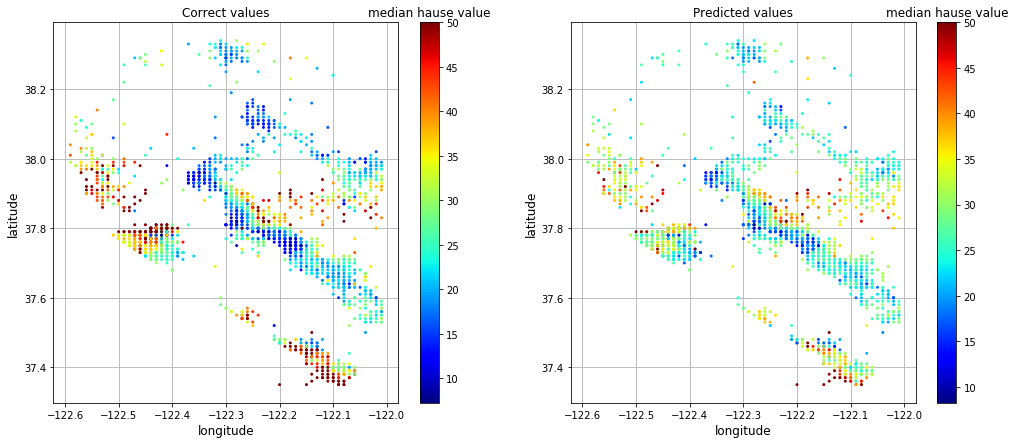

In [17]:
fig=plt.figure(figsize=(17,7))

test_df = pd.read_csv('Data/Output/test.csv')

plt.subplot(1,2,1)
plt.scatter(training_df.longitude[training_df.ocean_proximity=='NEAR BAY'], training_df.latitude[training_df.ocean_proximity=='NEAR BAY'], c=training_df.correct_labels[training_df.ocean_proximity=='NEAR BAY'], marker='.', s=15, cmap='jet', zorder=3)
plt.scatter(test_df.longitude[test_df.ocean_proximity=='NEAR BAY'], test_df.latitude[test_df.ocean_proximity=='NEAR BAY'], c=test_df.correct_labels[test_df.ocean_proximity=='NEAR BAY'], marker='.', s=15, cmap='jet', zorder=3)
plt.xlabel('longitude', fontsize='12')
plt.ylabel('latitude', fontsize='12')
cbar = plt.colorbar()
cbar.ax.set_title('median hause value', fontsize='12')
plt.title('Correct values')
plt.grid(True, zorder=0)

plt.subplot(1,2,2)
plt.scatter(training_df.longitude[training_df.ocean_proximity=='NEAR BAY'], training_df.latitude[training_df.ocean_proximity=='NEAR BAY'], c=training_df.predicted_labels[training_df.ocean_proximity=='NEAR BAY'], marker='.', s=15, cmap='jet', zorder=3)
plt.scatter(test_df.longitude[test_df.ocean_proximity=='NEAR BAY'], test_df.latitude[test_df.ocean_proximity=='NEAR BAY'], c=test_df.predicted_labels[test_df.ocean_proximity=='NEAR BAY'], marker='.', s=15, cmap='jet', zorder=3)
plt.xlabel('longitude', fontsize='12')
plt.ylabel('latitude', fontsize='12')
cbar = plt.colorbar()
cbar.ax.set_title('median hause value', fontsize='12')
plt.title('Predicted values')
plt.grid(True, zorder=0)


plt.show()

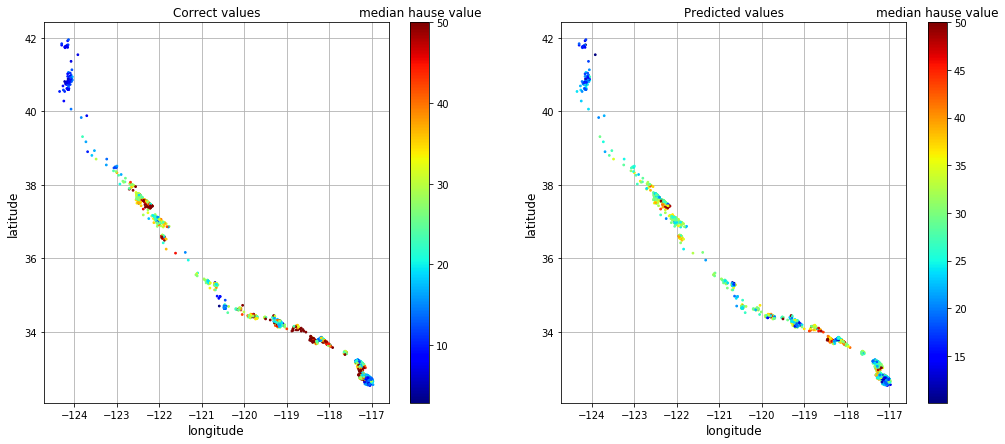

In [18]:
fig=plt.figure(figsize=(17,7))

test_df = pd.read_csv('Data/Output/test.csv')

plt.subplot(1,2,1)
plt.scatter(training_df.longitude[training_df.ocean_proximity=='NEAR OCEAN'], training_df.latitude[training_df.ocean_proximity=='NEAR OCEAN'], c=training_df.correct_labels[training_df.ocean_proximity=='NEAR OCEAN'], marker='.', s=12, cmap='jet', zorder=3)
plt.scatter(test_df.longitude[test_df.ocean_proximity=='NEAR OCEAN'], test_df.latitude[test_df.ocean_proximity=='NEAR OCEAN'], c=test_df.correct_labels[test_df.ocean_proximity=='NEAR OCEAN'], marker='.', s=12, cmap='jet', zorder=3)
plt.xlabel('longitude', fontsize='12')
plt.ylabel('latitude', fontsize='12')
cbar = plt.colorbar()
cbar.ax.set_title('median hause value', fontsize='12')
plt.title('Correct values')
plt.grid(True, zorder=0)

plt.subplot(1,2,2)
plt.scatter(training_df.longitude[training_df.ocean_proximity=='NEAR OCEAN'], training_df.latitude[training_df.ocean_proximity=='NEAR OCEAN'], c=training_df.predicted_labels[training_df.ocean_proximity=='NEAR OCEAN'], marker='.', s=12, cmap='jet', zorder=3)
plt.scatter(test_df.longitude[test_df.ocean_proximity=='NEAR OCEAN'], test_df.latitude[test_df.ocean_proximity=='NEAR OCEAN'], c=test_df.predicted_labels[test_df.ocean_proximity=='NEAR OCEAN'], marker='.', s=12, cmap='jet', zorder=3)
plt.xlabel('longitude', fontsize='12')
plt.ylabel('latitude', fontsize='12')
cbar = plt.colorbar()
cbar.ax.set_title('median hause value', fontsize='12')
plt.title('Predicted values')
plt.grid(True, zorder=0)


plt.show()

NB: from now on the graphs might look deprecated. If one wanted to see one of these plots he should ran the corresponding simulation between alpha test, seed test and PCA test 

### $\alpha$ Evaluation

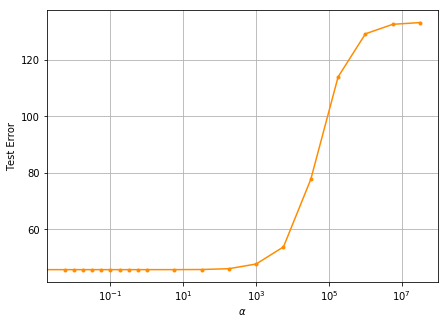

In [32]:
alpha_plot = pd.read_csv('Data/Output/housing_results.csv')
fig=plt.figure(figsize=(7,5))

#plt.subplot(2,1,1)
#plt.plot(alpha_plot.alpha, alpha_plot.training_error, color='darkviolet', label='Training error', linewidth=1.0, marker='.')
plt.plot(alpha_plot.alpha, alpha_plot.test_error, color='darkorange', label='Test error', linewidth=1.5, marker='.')
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('Test Error')
plt.grid(True)
#plt.legend(fontsize='13')

plt.show()

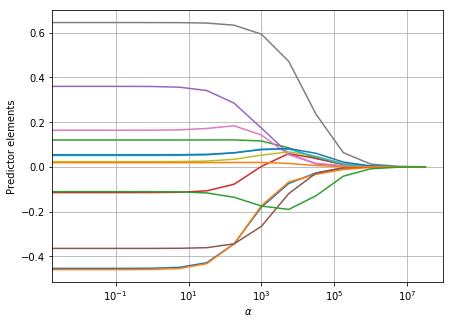

In [34]:
fig=plt.figure(figsize=(7,5))
pred = pd.read_csv('Data/Output/predictor.csv')

for column in pred:
    plt.plot(alpha_plot.alpha, pred[column], linewidth=1.5)

plt.xscale('log')

plt.xlabel(r'$\alpha$')
plt.ylabel(r'Predictor elements')
plt.grid(True)
plt.show()

### Seed Test

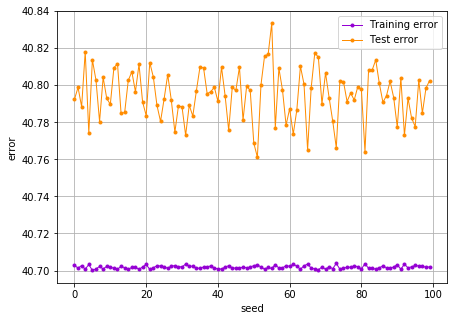

In [24]:
seed_plot = pd.read_csv('Data/Output/housing_results.csv')
fig=plt.figure(figsize=(7,5))

#plt.subplot(2,1,1)
plt.plot(seed_plot.seed, seed_plot.training_error, color='darkviolet', label='Training error', linewidth=1.0, marker='.')
plt.plot(seed_plot.seed, seed_plot.test_error, color='darkorange', label='Test error', linewidth=1.0, marker='.')
plt.xlabel('seed')
plt.ylabel('error')
plt.grid(True)
plt.legend(fontsize='10')

plt.show()

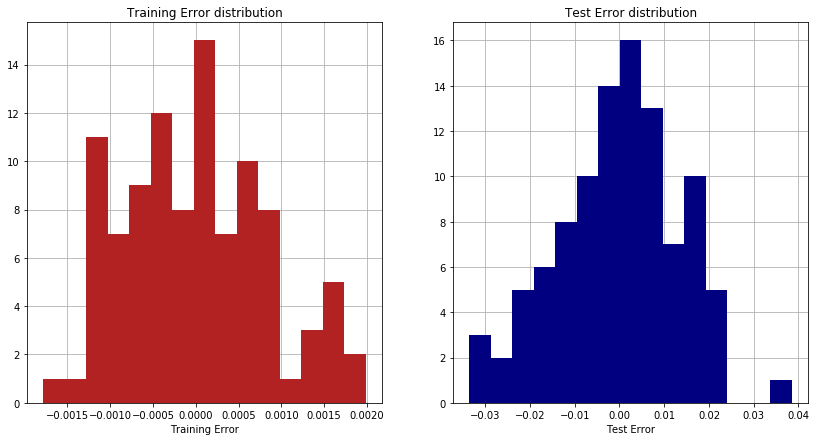

In [28]:
fig=plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
plt.hist(seed_plot.training_error-seed_plot.training_error.mean(), bins=15, color='firebrick', zorder=3)
plt.xlabel('Training Error')
plt.title('Training Error distribution')
plt.grid(True, zorder=0)

plt.subplot(1,2,2)
plt.hist(seed_plot.test_error - seed_plot.test_error.mean(), bins=15, color='navy', zorder=3)
plt.xlabel('Test Error')
plt.title('Test Error distribution')
plt.grid(True, zorder=0)

plt.show()

### Eigenvalues Deletion Test

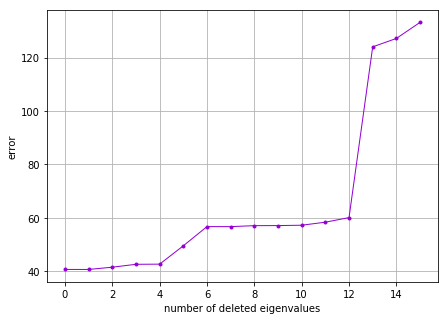

In [30]:
eigen_plot = pd.read_csv('Data/Output/housing_results.csv')
fig=plt.figure(figsize=(7,5))

#plt.subplot(1,2,1)
plt.plot(eigen_plot.eigen_delete, eigen_plot.training_error, color='darkviolet', label='Training error', linewidth=1.0, marker='.')
#plt.plot(eigen_plot.eigen_delete, eigen_plot.test_error, color='darkorange', label='Test error', linewidth=1.0, marker='.')
plt.xlabel('number of deleted eigenvalues')
plt.ylabel('error')
plt.grid(True)
#plt.legend(fontsize='10')

'''
plt.subplot(1,2,2)
plt.plot(eigen_plot.eigen_delete, eigen_plot.training_error, color='darkviolet', label='Training error', linewidth=1.0, marker='.')
plt.plot(eigen_plot.eigen_delete, eigen_plot.test_error, color='darkorange', label='Test error', linewidth=1.0, marker='.')
plt.xlabel('number of deleted eigenvalues')
plt.ylabel('error')
plt.xlim(0,3)
plt.ylim(45,47)
plt.grid(True)
plt.legend(fontsize='10')
'''


plt.show()